In [1]:
from google.colab import files
uploaded  = files.upload()


Saving heart.csv to heart (1).csv


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('/content/heart.csv')

In [4]:
print(df.info())
print(df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0      

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: ylabel='target'>

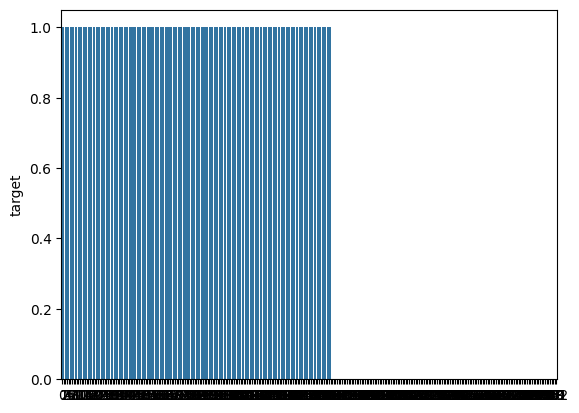

In [7]:
sns.barplot(df['target'])

In [9]:
x=df.drop(columns=['target'])
y=df['target']
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.75      0.71      0.73        38

    accuracy                           0.67        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.68      0.67      0.67        61



In [10]:
roc_auc_score(y_test,y_pred)

0.6596109839816934

In [12]:
leaf_size=list(range(1,5))
n_neighbors=list(range(1,9))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)


In [13]:
knn_2=KNeighborsClassifier()
clf=GridSearchCV(knn_2,hyperparameters,cv=10,scoring='roc_auc')
best_model=clf.fit(x,y)

In [15]:
#Nilai hyperparameters tarbaik
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score:',best_model.best_score_)

Best leaf_size: 2
Best p: 1
Best n_neighbors: 7
Best Score: 0.7474345507433744


In [16]:
y_pred=best_model.predict(x_test)
print(classification_report(y_test,y_pred))
print("AUC SCORE IS",roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61

AUC SCORE IS 0.7991990846681923
